In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from collections import OrderedDict
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import reprlib

In [2]:
clf = svm.SVC(kernel='linear', random_state=42)

In [3]:
# Pastikan untuk mengganti path dengan absolute path direktorimu jika baris berikut dijalankan ulang, atau restart kernel.
base = 'prabowo_label.csv'
lb_senti = 'prabowo_senti.csv'

Corpus = pd.read_csv(base, encoding='latin-1', sep=',')
LabelSenti = pd.read_csv(lb_senti, encoding='latin-1', header=None, names=['label'], dtype=str)

In [4]:
neg, pos = (LabelSenti['label'][LabelSenti['label']=='negatif']).count(), (LabelSenti['label'][LabelSenti['label']=='positif']).count()
print('neg:', neg, '(', '{0:.2f}'.format(neg/(neg+pos)*100), '%)','\t', 'pos:', pos, '(', '{0:.2f}'.format(pos/(neg+pos)*100),'%)')

neg: 2438 ( 61.41 %) 	 pos: 1532 ( 38.59 %)


In [5]:
Corpus = pd.DataFrame(Corpus[['stemming', 'label']])
Corpus

,stemming,label
0,"['kali', 'ganti', 'lanjut', 'presiden', 'jokow...",negatif
1,"['respons', 'kornas', 'pdip', 'gerindra', 'tem...",negatif
2,"['survei', 'periodik', 'litbang', 'kompas', 'w...",negatif
3,"['partai', 'besut', 'unggul', 'golkar', 'perin...",positif
4,"['respons', 'kornas', 'pdip', 'gerindra', 'tem...",negatif
...,...,...
3965,"['simpul', 'menhan', 'politik', 'aku', 'kancah...",negatif
3966,"['simpul', 'menhan', 'politik', 'aku', 'kancah...",negatif
3967,"['bangsa', 'indonesia', 'sadar', 'cinta', 'ragu']",positif
3968,"['teliti', 'badan', 'riset', 'inovasi', 'nasio...",negatif


C:\Users\wols88\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Fold 0:
accuracy: 0.8236775818639799
precision: 0.8671586715867159
[[419  36]
 [104 235]]
# Fold 1:
accuracy: 0.8438287153652393
precision: 0.8760683760683761
[[465  29]
 [ 95 205]]
# Fold 2:
accuracy: 0.8576826196473551
precision: 0.842741935483871
[[472  39]
 [ 74 209]]
# Fold 3:
accuracy: 0.8387909319899244
precision: 0.8677685950413223
[[456  32]
 [ 96 210]]
# Fold 4:
accuracy: 0.8312342569269522
precision: 0.8571428571428571
[[456  34]
 [100 204]]


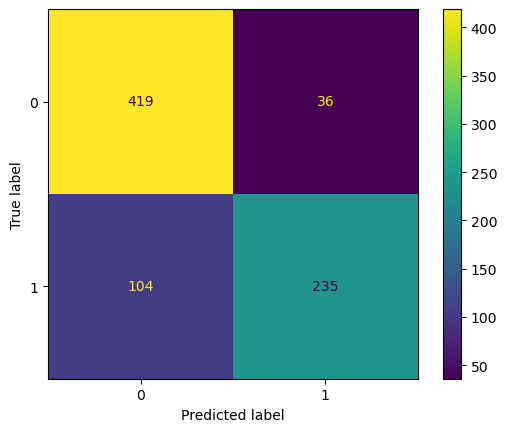

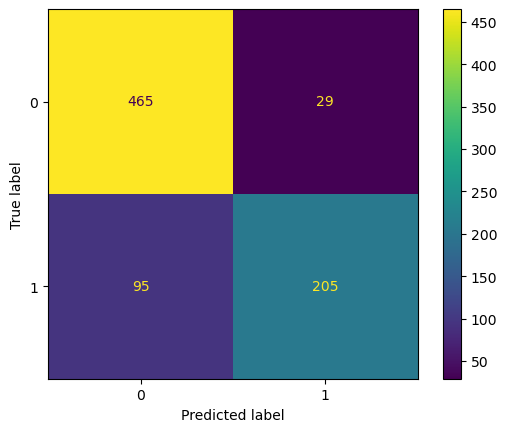

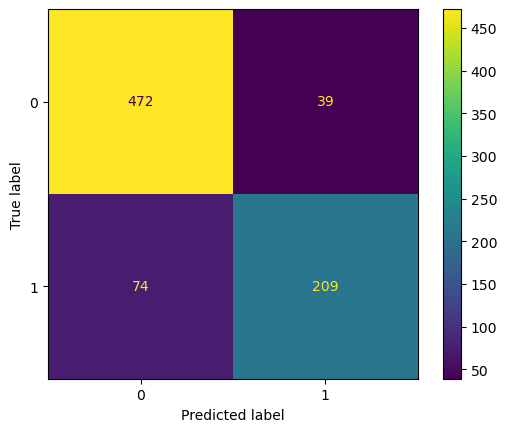

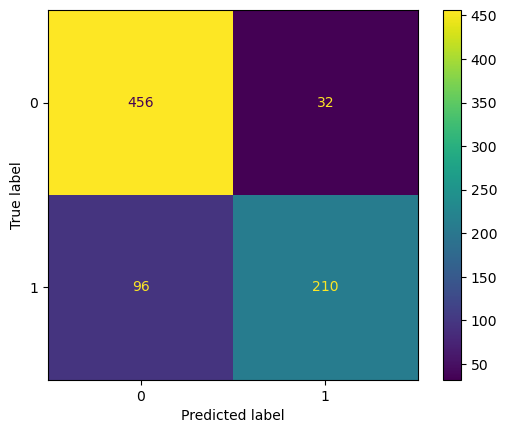

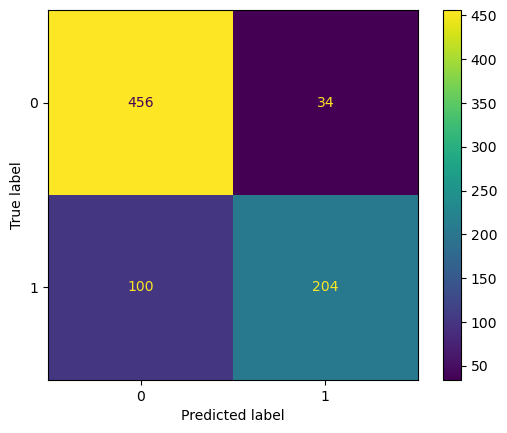

In [11]:
featExt = 'tfidf'

Encoder = LabelEncoder()

Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(Corpus['stemming'])

X = Tfidf_vect.fit_transform(Corpus['stemming'])
y = Corpus[['label']]
y = Encoder.fit_transform(y)
# print(y)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     print(train_index, test_index)
    
    clf.fit(X_train, y_train)
#     print(clf.coef_)
#     print(clf.intercept_)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'# Fold {fold}:')
#     print(f"  Train: index={train_index}")
#     print(f"  Test:  index={test_index}")
    
#     print(classification_report(y_test, y_pred), "\n")
    print(f'accuracy: {accuracy}')
    print(f'precision: {precision}')
# membuat confusion Matrix
    matrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    matrix.plot()  
    print(conf_matrix)